# Fire Prediction LTSM
Followed tutorial from https://machinelearningmastery.com/lstm-for-time-series-prediction-in-pytorch/


In [1]:
!pip install torch --index-url https://download.pytorch.org/whl/cu126
!pip install matplotlib

Looking in indexes: https://download.pytorch.org/whl/cu126


In [2]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.optim as optim
import torch.utils.data as data

from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Load data, group by ID, split into train/test
data_all = pd.read_csv("./data/weather/weather_training_data.csv")
data_all.head()
data_all.dropna(how="any", inplace=True)
data_all.drop(columns=['Unnamed: 0', 'index'], inplace=True)
groups = data_all.groupby(data_all['ID']) # new "window " is the number of days of weather prior + incident duration
dataset = {}
for group in groups:
    dataset[group[0]] = group[1].drop(columns=['ID'])
max_len = len(max(list(dataset.values()), key=len).index)
d = []
for key in dataset:
    if len(dataset[key]['Fire'].unique()) < 2:
        d.append(key)
for k in d:
    dataset.pop(k)
train_num = int(.7*len(dataset))
train_ = dict(list(dataset.items())[:train_num]) 
val = dict(list(dataset.items())[train_num:]) 
print(len(train_), len(val))

578 249


In [4]:
#calculate dropouts
total_days = 0
total_dropouts = 0
for train in train_.values():
    total_days += len(train['DATE'])
    total_days_diff = pd.to_datetime(train['DATE']).diff() 
    for i, d in enumerate(total_days_diff):
        if i > 0:
            if d > datetime.timedelta(1):
                total_dropouts += 1
dropouts = total_dropouts/total_days
dropouts
    

0.015090679286323154

In [5]:
def create_dataset(dataset):
    """Transform a time series into a prediction dataset
    
    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction

    Notes:
    Adapted from https://machinelearningmastery.com/lstm-for-time-series-prediction-in-pytorch/
    """

    #X, y = [], []
    feature = dataset[['VALUE_temp', 'VALUE_precip', 'PRIOR_precip', 'DPT (F)',
    'DBT (F)', 'Wind Speed (m/s)', 'Wind Dir']].values
    target = dataset['Fire'].values
    X = torch.tensor(feature, dtype=torch.float32)
    y = torch.tensor(target, dtype=torch.float32)
    return X, y

In [ ]:
#make data into tensors and scale
scaler = MinMaxScaler()
xs = []
ys = []
dates = None
for event in train_:
    print(event)
    train = train_[event]
    cols = list(train.columns)
    for column in train.columns:
        if column != 'DATE':
            train[column] = train[column].apply(pd.to_numeric, errors='coerce')
    train.dropna(how='any', inplace=True)
    dates = pd.concat([dates, train['DATE']])
    train = train.drop(columns=['DATE'])
    df_scaled = scaler.fit_transform(train.to_numpy())
    train = pd.DataFrame(df_scaled, columns=list(train.columns))
    x, y = create_dataset(train)
    xs.append(x)
    ys.append(y)
for i in xs:
    print(i, i.shape)
#pad training data
lengths = torch.tensor([len(seq) for seq in xs])
padded_x = pad_sequence(xs, batch_first=True)

lengths_y = torch.tensor([len(seq) for seq in ys])
padded_y = pad_sequence(ys, batch_first=True)


# make val data into tensors and scale
xvs = []
yvs = []
dates_v = None
for event in val:
    print(event)
    v = val[event]
    cols = list(v.columns)
    for column in v.columns:
        if column != 'DATE':
            v[column] = v[column].apply(pd.to_numeric, errors='coerce')
    v.dropna(how='any', inplace=True)
    dates_v = pd.concat([dates_v, v['DATE']])
    v = v.drop(columns=['DATE'])
    df_scaled = scaler.fit_transform(v.to_numpy())
    v = pd.DataFrame(df_scaled, columns=list(v.columns))
    x, y = create_dataset(v)
    xvs.append(x)
    yvs.append(y)
    
#pad training data
lengths_v = torch.tensor([len(seq) for seq in xvs])
padded_x_v = pad_sequence(xvs, batch_first=True)

lengths_y_v = torch.tensor([len(seq) for seq in yvs])
padded_y_v = pad_sequence(yvs, batch_first=True)


156.0
157.0
158.0
159.0
160.0
161.0
162.0
163.0
164.0
165.0
167.0
168.0
169.0
170.0
171.0
172.0
174.0
176.0
177.0
178.0
179.0
180.0
181.0
182.0
183.0
184.0
185.0
186.0
187.0
188.0
189.0
190.0
191.0
192.0
193.0
195.0
196.0
197.0
199.0
200.0
201.0
204.0
205.0
206.0
207.0
208.0
209.0
210.0
212.0
213.0
214.0
217.0
218.0
219.0
220.0
221.0
222.0
223.0
224.0
225.0
226.0
227.0
228.0
229.0
230.0
231.0
232.0
233.0
235.0
236.0
238.0
239.0
242.0
243.0
244.0
245.0
246.0
248.0
249.0
250.0
251.0
252.0
255.0
257.0
258.0
259.0
260.0
261.0
262.0
263.0
264.0
265.0
266.0
267.0
268.0
269.0
270.0
271.0
272.0
273.0
274.0
275.0
276.0
277.0
278.0
279.0
280.0
281.0
282.0
283.0
284.0
285.0
286.0
287.0
288.0
290.0
291.0
293.0
294.0
295.0
297.0
298.0
299.0
300.0
301.0
302.0
303.0
305.0
306.0
307.0
309.0
310.0
311.0
312.0
313.0
314.0
315.0
316.0
317.0
318.0
319.0
320.0
321.0
322.0
324.0
325.0
326.0
327.0
328.0
329.0
330.0
331.0
332.0
333.0
334.0
335.0
337.0
340.0
341.0
342.0
343.0
344.0
345.0
346.0
347.0
350.0
351.

In [11]:
# Define model, now using more hidden nodes
class FireModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # 7 features, hidden_size 50 and num_layers cause that's what the example did
        self.lstm = torch.nn.LSTM(input_size=7, hidden_size=64, num_layers=2, dropout=dropouts, batch_first=True)
        self.linear = torch.nn.Linear(64, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x) 
        return x.squeeze(-1)

In [12]:
model = FireModel()
optimizer = optim.Adam(model.parameters())
loss_fn = torch.nn.BCEWithLogitsLoss()
avglosses = []
accuracies = []
loader = data.DataLoader(data.TensorDataset(padded_x, padded_y), shuffle=True, batch_size=8) 
epochs = 200

for epoch in range(epochs):
    l = 0
    model.train()
    y_outs = []
    y_tests = []
    y_batchs = []
    y_batch_test = []
    i = 0
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad() #memory reduction
        loss.backward()
        optimizer.step()
    # Validation
        y_pred_output = torch.sigmoid(y_pred)
        y_pred_output = torch.where(y_pred_output > 0.5, torch.tensor(1.0), torch.tensor(0.0))
        y_outs.append(y_pred_output)  # Append the batch of predictions
        y_batchs.append(y_batch)
        l += loss.item()
        i += 1
    avglosses.append(l/i)
    y_outs = torch.cat(y_outs)
    trues = torch.cat(y_batchs)
    y_outs_flat = y_outs.flatten()
    trues_flat = trues.flatten()
    j = 0
    accuracy = 0
    for yo,t in zip(y_outs_flat, trues_flat):
        j+=1
        if yo == t:
            accuracy += 1
    accuracies.append(accuracy/j)
    print("Epoch %d: Accuracy %.4f, Loss: %.4f" % (epoch, accuracy/j, loss))
print("Final Training Accuracy: %.4f" % (accuracy/j))

Epoch 0: Accuracy 0.7183, Loss: 0.3822
Epoch 1: Accuracy 0.6949, Loss: 0.5628
Epoch 2: Accuracy 0.8136, Loss: 0.1744
Epoch 3: Accuracy 0.9295, Loss: 0.4472
Epoch 4: Accuracy 0.9232, Loss: 0.1131
Epoch 5: Accuracy 0.9399, Loss: 0.1875
Epoch 6: Accuracy 0.9474, Loss: 0.1257
Epoch 7: Accuracy 0.9465, Loss: 0.0789
Epoch 8: Accuracy 0.9349, Loss: 0.0818
Epoch 9: Accuracy 0.7968, Loss: 0.6948
Epoch 10: Accuracy 0.6800, Loss: 0.3331
Epoch 11: Accuracy 0.9132, Loss: 0.1379
Epoch 12: Accuracy 0.9373, Loss: 0.4945
Epoch 13: Accuracy 0.9411, Loss: 0.2667
Epoch 14: Accuracy 0.9449, Loss: 0.1679
Epoch 15: Accuracy 0.9465, Loss: 0.0796
Epoch 16: Accuracy 0.9494, Loss: 0.0914
Epoch 17: Accuracy 0.9485, Loss: 0.0849
Epoch 18: Accuracy 0.9506, Loss: 0.0983
Epoch 19: Accuracy 0.9493, Loss: 0.2305
Epoch 20: Accuracy 0.9507, Loss: 0.3048
Epoch 21: Accuracy 0.9508, Loss: 0.0487
Epoch 22: Accuracy 0.9512, Loss: 0.2877
Epoch 23: Accuracy 0.9535, Loss: 0.0719
Epoch 24: Accuracy 0.9526, Loss: 0.1100
Epoch 25: 

In [13]:
all_ys = np.array(torch.cat([torch.cat(ys), torch.cat(yvs)]).flatten())
y_preds_train = torch.where(torch.sigmoid(model(padded_x)) > 0.5, torch.tensor(1.0), torch.tensor(0.0))
y_preds_val = torch.where(torch.sigmoid(model(padded_x_v)) > 0.5, torch.tensor(1.0), torch.tensor(0.0))
unpadded_train_pred = [y[:length] for y, length in zip(y_preds_train, lengths)]
unpadded_val_pred = [y[:length] for y, length in zip(y_preds_val, lengths_v)]

y_pred_train = np.ones_like(all_ys) * np.nan
y_pred_val = np.ones_like(all_ys) * np.nan

y_pred_train[:torch.cat(unpadded_train_pred).flatten().size(0)] = torch.cat(unpadded_train_pred).flatten()
y_pred_val[torch.cat(unpadded_train_pred).flatten().size(0):] = torch.cat(unpadded_val_pred).flatten()
dates = pd.concat([dates, dates_v])
print(len(dates), len(all_ys))
df = pd.DataFrame({'True Fires': all_ys, 'train_preds': y_pred_train, 'val_preds': y_pred_val, 'dates': dates})
df.head()

213062 213062


,True Fires,train_preds,val_preds,dates
153207,0.0,0.0,NaN,2018-01-10
153208,0.0,0.0,NaN,2018-01-11
153209,0.0,0.0,NaN,2018-01-12
153210,0.0,0.0,NaN,2018-01-13
153211,0.0,0.0,NaN,2018-01-14


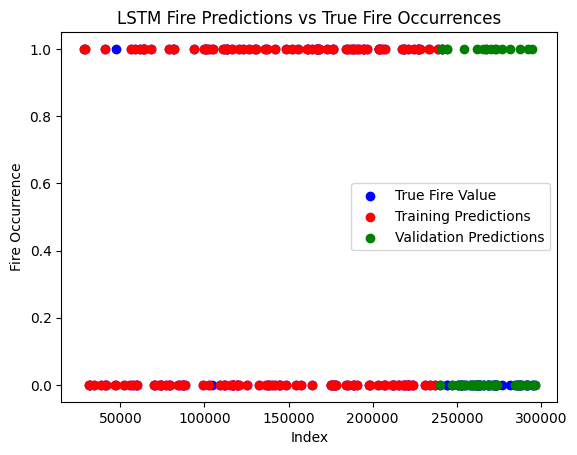

In [14]:
downsample_df = df.sample(frac=.001)
plt.scatter(downsample_df['dates'].index, downsample_df['True Fires'], c='b', label='True Fire Value')
plt.scatter(downsample_df['dates'].index, downsample_df['train_preds'], c='r', label='Training Predictions')
plt.scatter(downsample_df['dates'].index, downsample_df['val_preds'], c='g', label='Validation Predictions')
plt.legend()
plt.title("LSTM Fire Predictions vs True Fire Occurrences")
plt.xlabel("Index")
plt.ylabel("Fire Occurrence")
plt.show()

In [15]:
val_df = df[(df['val_preds'] == 0) | (df['val_preds'] == 1)]
val_accuracy = val_df[val_df['val_preds'] == val_df['True Fires']]
Val_acc = len(val_accuracy.index)/len(val_df.index)
Val_acc

0.7469290289991505

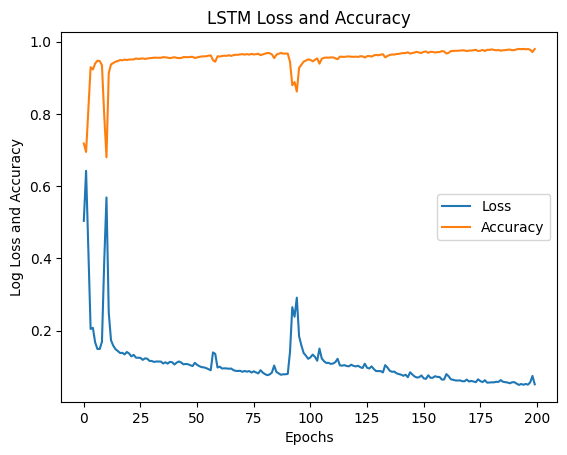

In [16]:
plt.plot(avglosses, label="Loss")
plt.plot(accuracies, label="Accuracy")
plt.title("LSTM Loss and Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Log Loss and Accuracy")
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(val_df['True Fires'], val_df['val_preds'])

array([[30133, 10917],
       [  105,  2398]], dtype=int64)